## Import Library

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter # Untuk memformat angka pada sumbu y (misalnya sebagai persen atau format angka lain)
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from scipy.stats import spearmanr
from scipy.stats import pearsonr
from scipy.optimize import curve_fit
from scipy.stats import kruskal
from scipy.stats import mannwhitneyu

## Loading Data

In [2]:
# Data Loading Fact GDP
df_factGDP = pd.read_csv('/Users/bee/final-project-final-project-coda-003-rmt-group-001 copy/fact_GDP.csv')
df_factGDP.head()

,country,year,gdp
0,Aruba,1960,NaN
1,Africa Eastern and Southern,1960,NaN
2,Afghanistan,1960,NaN
3,Africa Western and Central,1960,NaN
4,Angola,1960,NaN


In [3]:
# Data Loading Fact Education
df_factedu = pd.read_csv('/Users/bee/final-project-final-project-coda-003-rmt-group-001 copy/fact_edu.csv')
df_factedu.head()

,country,completion_rate,dropout_rate,unemployment_rate
0,Afghanistan,23.0,56.5,11.12
1,Albania,78.0,18.0,12.33
2,Algeria,29.5,0.0,11.70
3,Andorra,0.0,0.0,0.00
4,Angola,19.5,0.0,6.89


In [4]:
# Data Loading Fact Intentional Homicide
df_facthomi = pd.read_csv('/Users/bee/final-project-final-project-coda-003-rmt-group-001 copy/fact_homi.csv')
df_facthomi.head()

,country,year,nummber_convicted_for_intentional_homicide,rate_per_100k_population
0,Albania,2003,158.0,5.067209
1,Armenia,2003,73.0,2.402131
2,Austria,2003,37.0,0.455519
3,Bulgaria,2003,134.0,1.716978
4,Bahrain,2003,1.0,0.123263


In [5]:
# Data Loading dim country
df_dimcountry = pd.read_csv('/Users/bee/final-project-final-project-coda-003-rmt-group-001 copy/dim_country.csv')
df_dimcountry.head()

,country,latitude,longitude,region,subregion,country_code,country_status
0,Afghanistan,33.939110,67.709953,Asia,Southern Asia,AFG,Conflict Zone
1,Albania,41.153332,20.168331,Europe,Southern Europe,ALB,Middle Income
2,Algeria,28.033886,1.659626,Africa,Northern Africa,DZA,Middle Income
3,Andorra,42.506285,1.521801,Europe,Southern Europe,AND,High Income
4,Angola,11.202692,17.873887,Africa,Sub-Saharan Africa,AGO,Middle Income


## Extract

In [6]:
# # Hanya akan mengambil data tahun 2021 pada Fact GDP 
df_factGDP = df_factGDP[
                        (df_factGDP['year'] == 2021)] 
df_factGDP.head()

,country,year,gdp
16226,Aruba,2021,NaN
16227,Africa Eastern and Southern,2021,"4,771326065"
16228,Afghanistan,2021,NaN
16229,Africa Western and Central,2021,"3,203484297"
16230,Angola,2021,"2,297108889"


In [7]:
# Hanya akan mengambil data tahun 2021 pada Fact Intentional Homicide 
df_facthomi = df_facthomi[
                        (df_facthomi['year'] == 2021)] 
df_facthomi.head()

,country,year,nummber_convicted_for_intentional_homicide,rate_per_100k_population
1168,Albania,2021,96.0,3.368852
1169,Argentina,2021,2591.0,5.718097
1170,Antigua and Barbuda,2021,0.0,0.000000
1171,Australia,2021,76.0,0.292798
1172,Austria,2021,39.0,0.434925


In [8]:
# Ambil data yang dibutuhkan
# ==============================

# Standarisasi nama kolom sebelum merge
df_edu = df_factedu.rename(columns={'country': 'country'})
df_gdp = df_factGDP.rename(columns={'country': 'country'})
df_dimcountry = df_dimcountry.rename(columns={'country': 'country'})
df_homi = df_facthomi.rename(columns={'country': 'country'})

# Standarisasi format nama negara (lowercase & strip spaces)
df_edu['country'] = df_edu['country'].str.lower().str.strip()
df_gdp['country'] = df_gdp['country'].str.lower().str.strip()
df_dimcountry['country'] = df_dimcountry['country'].str.lower().str.strip()
df_homi['country'] = df_homi['country'].str.lower().str.strip()

# df_homi_grouped = df_homi.groupby("country", as_index=False).agg({
#     "rate_per_100k_population": "mean"  # Hitung rata-rata per negara
#     # "homicide_number": "sum"  # (Opsional) Bisa pakai sum jika ingin total
# })
# df_final = df_edu \
#     .merge(df_gdp, on="country", how="left") \
#     .merge(df_homi_grouped, on="country", how="left") \  
#     .merge(df_dimcountry, on="country", how="left")


df = df_edu \
    .merge(df_gdp, on="country", how="left") \
    .merge(df_homi, on="country", how="left") \
    .merge(df_dimcountry, on="country", how="left")

# Ganti nama kolom agar lebih deskriptif
df.rename(columns={
    'year_x': 'year',
    'nummber_convicted_for_intentional_homicide':'num_convicted_for_intentional_homicide' 
}, inplace=True)

df = df.drop(columns=["year_y"]) 


# Tampilkan hasil
df.head()

,country,completion_rate,dropout_rate,unemployment_rate,year,gdp,num_convicted_for_intentional_homicide,rate_per_100k_population,latitude,longitude,region,subregion,country_code,country_status
0,afghanistan,23.0,56.5,11.12,2021.0,NaN,NaN,NaN,33.939110,67.709953,Asia,Southern Asia,AFG,Conflict Zone
1,albania,78.0,18.0,12.33,2021.0,"3,022559881",96.0,3.368852,41.153332,20.168331,Europe,Southern Europe,ALB,Middle Income
2,algeria,29.5,0.0,11.70,2021.0,"5,514032841",594.0,1.327045,28.033886,1.659626,Africa,Northern Africa,DZA,Middle Income
3,andorra,0.0,0.0,0.00,2021.0,"2,583972216",NaN,NaN,42.506285,1.521801,Europe,Southern Europe,AND,High Income
4,angola,19.5,0.0,6.89,2021.0,"2,297108889",NaN,NaN,11.202692,17.873887,Africa,Sub-Saharan Africa,AGO,Middle Income


## Eksplorasi Data

In [9]:
df.head()

,country,completion_rate,dropout_rate,unemployment_rate,year,gdp,num_convicted_for_intentional_homicide,rate_per_100k_population,latitude,longitude,region,subregion,country_code,country_status
0,afghanistan,23.0,56.5,11.12,2021.0,NaN,NaN,NaN,33.939110,67.709953,Asia,Southern Asia,AFG,Conflict Zone
1,albania,78.0,18.0,12.33,2021.0,"3,022559881",96.0,3.368852,41.153332,20.168331,Europe,Southern Europe,ALB,Middle Income
2,algeria,29.5,0.0,11.70,2021.0,"5,514032841",594.0,1.327045,28.033886,1.659626,Africa,Northern Africa,DZA,Middle Income
3,andorra,0.0,0.0,0.00,2021.0,"2,583972216",NaN,NaN,42.506285,1.521801,Europe,Southern Europe,AND,High Income
4,angola,19.5,0.0,6.89,2021.0,"2,297108889",NaN,NaN,11.202692,17.873887,Africa,Sub-Saharan Africa,AGO,Middle Income


In [10]:
# Cek struktur data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   country                                 202 non-null    object 
 1   completion_rate                         202 non-null    float64
 2   dropout_rate                            202 non-null    float64
 3   unemployment_rate                       202 non-null    float64
 4   year                                    166 non-null    float64
 5   gdp                                     142 non-null    object 
 6   num_convicted_for_intentional_homicide  65 non-null     float64
 7   rate_per_100k_population                65 non-null     float64
 8   latitude                                202 non-null    float64
 9   longitude                               202 non-null    float64
 10  region                                  155 non-null    object

In [11]:
# Cek Missing Value

# Hitung total nilai yang hilang per kolom
missing_counts = df.isnull().sum()

# Hitung persentase nilai yang hilang per kolom
missing_percentage = (missing_counts / len(df)) * 100

# Gabungkan hasil menjadi DataFrame
missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage (%)': missing_percentage
})

print(missing_summary)

                                        Missing Count  Missing Percentage (%)
country                                             0                0.000000
completion_rate                                     0                0.000000
dropout_rate                                        0                0.000000
unemployment_rate                                   0                0.000000
year                                               36               17.821782
gdp                                                60               29.702970
num_convicted_for_intentional_homicide            137               67.821782
rate_per_100k_population                          137               67.821782
latitude                                            0                0.000000
longitude                                           0                0.000000
region                                             47               23.267327
subregion                                          47           

In [12]:
# Cek Duplicate Data
duplikasi = df.duplicated()
print(f"Jumlah baris duplikat: {duplikasi.sum()}")

Jumlah baris duplikat: 0


## Data Cleaning

In [13]:
# Gantilah koma (,) dengan titik (.) agar bisa dikonversi ke float
df['gdp'] = df['gdp'].astype(str).str.replace(',', '.')

# Konversi ke float
df['gdp'] = pd.to_numeric(df['gdp'], errors='coerce')

# Isi nilai NaN dengan tahun 2021 dan mengganti tipe datanya ke int
df["year"] = df["year"].fillna(2021).astype(int)

# Tampilkan tipe data setelah konversi
print(df.dtypes)

country                                    object
completion_rate                           float64
dropout_rate                              float64
unemployment_rate                         float64
year                                        int64
gdp                                       float64
num_convicted_for_intentional_homicide    float64
rate_per_100k_population                  float64
latitude                                  float64
longitude                                 float64
region                                     object
subregion                                  object
country_code                               object
country_status                             object
dtype: object


In [14]:
# Membulatkan kolom 'GDP 2021' ke 2 desimal
df['gdp'] = df['gdp'].round(2)

In [15]:
# Cek Missing Value

# Hitung total nilai yang hilang per kolom
missing_counts = df.isnull().sum()

# Hitung persentase nilai yang hilang per kolom
missing_percentage = (missing_counts / len(df)) * 100

# Gabungkan hasil menjadi DataFrame
missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage (%)': missing_percentage
})

print(missing_summary)

                                        Missing Count  Missing Percentage (%)
country                                             0                0.000000
completion_rate                                     0                0.000000
dropout_rate                                        0                0.000000
unemployment_rate                                   0                0.000000
year                                                0                0.000000
gdp                                                60               29.702970
num_convicted_for_intentional_homicide            137               67.821782
rate_per_100k_population                          137               67.821782
latitude                                            0                0.000000
longitude                                           0                0.000000
region                                             47               23.267327
subregion                                          47           

In [16]:
df.head()

,country,completion_rate,dropout_rate,unemployment_rate,year,gdp,num_convicted_for_intentional_homicide,rate_per_100k_population,latitude,longitude,region,subregion,country_code,country_status
0,afghanistan,23.0,56.5,11.12,2021,NaN,NaN,NaN,33.939110,67.709953,Asia,Southern Asia,AFG,Conflict Zone
1,albania,78.0,18.0,12.33,2021,3.02,96.0,3.368852,41.153332,20.168331,Europe,Southern Europe,ALB,Middle Income
2,algeria,29.5,0.0,11.70,2021,5.51,594.0,1.327045,28.033886,1.659626,Africa,Northern Africa,DZA,Middle Income
3,andorra,0.0,0.0,0.00,2021,2.58,NaN,NaN,42.506285,1.521801,Europe,Southern Europe,AND,High Income
4,angola,19.5,0.0,6.89,2021,2.30,NaN,NaN,11.202692,17.873887,Africa,Sub-Saharan Africa,AGO,Middle Income


In [17]:
# Isi missing value dengan 0 untuk kolom numerik
df[['gdp', 'num_convicted_for_intentional_homicide', 'rate_per_100k_population']] = df[['gdp', 'num_convicted_for_intentional_homicide', 'rate_per_100k_population']].fillna(0)

# handling missing value dengan nilai spesifik
df.fillna({
    "region": "unknown",
    "subregion": "unknown",
    "country_status": "unknown",
    "country_code": "none"
}, inplace=True)

# Cek kembali apakah masih ada missing value
print(df.isnull().sum())

country                                   0
completion_rate                           0
dropout_rate                              0
unemployment_rate                         0
year                                      0
gdp                                       0
num_convicted_for_intentional_homicide    0
rate_per_100k_population                  0
latitude                                  0
longitude                                 0
region                                    0
subregion                                 0
country_code                              0
country_status                            0
dtype: int64


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   country                                 202 non-null    object 
 1   completion_rate                         202 non-null    float64
 2   dropout_rate                            202 non-null    float64
 3   unemployment_rate                       202 non-null    float64
 4   year                                    202 non-null    int64  
 5   gdp                                     202 non-null    float64
 6   num_convicted_for_intentional_homicide  202 non-null    float64
 7   rate_per_100k_population                202 non-null    float64
 8   latitude                                202 non-null    float64
 9   longitude                               202 non-null    float64
 10  region                                  202 non-null    object

In [67]:
df.head()

,country,completion_rate,dropout_rate,unemployment_rate,year,gdp,num_convicted_for_intentional_homicide,rate_per_100k_population,latitude,longitude,region,subregion,country_code,country_status
0,afghanistan,23.0,56.5,11.12,2021,0.00,0.0,0.000000,33.939110,67.709953,Asia,Southern Asia,AFG,Conflict Zone
1,albania,78.0,18.0,12.33,2021,3.02,96.0,3.368852,41.153332,20.168331,Europe,Southern Europe,ALB,Middle Income
2,algeria,29.5,0.0,11.70,2021,5.51,594.0,1.327045,28.033886,1.659626,Africa,Northern Africa,DZA,Middle Income
3,andorra,0.0,0.0,0.00,2021,2.58,0.0,0.000000,42.506285,1.521801,Europe,Southern Europe,AND,High Income
4,angola,19.5,0.0,6.89,2021,2.30,0.0,0.000000,11.202692,17.873887,Africa,Sub-Saharan Africa,AGO,Middle Income


Situasional Variabel

In [65]:
# Menghapus baris yang memiliki GDP= 0
df_cleaned_gdp = df[(df["gdp"] != 0)]

# Menampilkan beberapa baris pertama
df_cleaned_gdp.head()

,country,completion_rate,dropout_rate,unemployment_rate,year,gdp,num_convicted_for_intentional_homicide,rate_per_100k_population,latitude,longitude,region,subregion,country_code,country_status
1,albania,78.0,18.0,12.33,2021,3.02,96.0,3.368852,41.153332,20.168331,Europe,Southern Europe,ALB,Middle Income
2,algeria,29.5,0.0,11.70,2021,5.51,594.0,1.327045,28.033886,1.659626,Africa,Northern Africa,DZA,Middle Income
3,andorra,0.0,0.0,0.00,2021,2.58,0.0,0.000000,42.506285,1.521801,Europe,Southern Europe,AND,High Income
4,angola,19.5,0.0,6.89,2021,2.30,0.0,0.000000,11.202692,17.873887,Africa,Sub-Saharan Africa,AGO,Middle Income
6,antigua and barbuda,0.0,13.0,0.00,2021,2.57,0.0,0.000000,17.060816,61.796428,Americas,Latin America and the Caribbean,ATG,High Income


In [68]:
df_cleaned_gdp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142 entries, 1 to 200
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   country                                 142 non-null    object 
 1   completion_rate                         142 non-null    float64
 2   dropout_rate                            142 non-null    float64
 3   unemployment_rate                       142 non-null    float64
 4   year                                    142 non-null    int64  
 5   gdp                                     142 non-null    float64
 6   num_convicted_for_intentional_homicide  142 non-null    float64
 7   rate_per_100k_population                142 non-null    float64
 8   latitude                                142 non-null    float64
 9   longitude                               142 non-null    float64
 10  region                                  142 non-null    object 
 11

In [ ]:
# Menghapus baris yang memiliki Completion Rate = 0
df_cleaned_cr = df[(df["completion_rate"] != 0)]

# Menampilkan beberapa baris pertama
df_cleaned_cr.head()

,country,completion_rate,dropout_rate,unemployment_rate,year,gdp,num_convicted_for_intentional_homicide,rate_per_100k_population,latitude,longitude,region,subregion,country_code,country_status
0,afghanistan,23.0,56.5,11.12,2021,0.00,0.0,0.000000,33.939110,67.709953,Asia,Southern Asia,AFG,Conflict Zone
1,albania,78.0,18.0,12.33,2021,3.02,96.0,3.368852,41.153332,20.168331,Europe,Southern Europe,ALB,Middle Income
2,algeria,29.5,0.0,11.70,2021,5.51,594.0,1.327045,28.033886,1.659626,Africa,Northern Africa,DZA,Middle Income
4,angola,19.5,0.0,6.89,2021,2.30,0.0,0.000000,11.202692,17.873887,Africa,Sub-Saharan Africa,AGO,Middle Income
7,argentina,49.5,11.0,9.79,2021,4.64,2591.0,5.718097,38.416097,63.616672,Americas,Latin America and the Caribbean,ARG,Middle Income


In [70]:
df_cleaned_cr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107 entries, 0 to 201
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   country                                 107 non-null    object 
 1   completion_rate                         107 non-null    float64
 2   dropout_rate                            107 non-null    float64
 3   unemployment_rate                       107 non-null    float64
 4   year                                    107 non-null    int64  
 5   gdp                                     107 non-null    float64
 6   num_convicted_for_intentional_homicide  107 non-null    float64
 7   rate_per_100k_population                107 non-null    float64
 8   latitude                                107 non-null    float64
 9   longitude                               107 non-null    float64
 10  region                                  107 non-null    object 
 11

In [72]:
# Menghapus baris yang memiliki Completion Rate & GDP = 0
df_cleaned_gdp_cr = df[(df["completion_rate"] != 0) & 
                        (df["gdp"] != 0)]

# Menampilkan beberapa baris pertama
df_cleaned_gdp_cr.head()

,country,completion_rate,dropout_rate,unemployment_rate,year,gdp,num_convicted_for_intentional_homicide,rate_per_100k_population,latitude,longitude,region,subregion,country_code,country_status
1,albania,78.0,18.0,12.33,2021,3.02,96.0,3.368852,41.153332,20.168331,Europe,Southern Europe,ALB,Middle Income
2,algeria,29.5,0.0,11.70,2021,5.51,594.0,1.327045,28.033886,1.659626,Africa,Northern Africa,DZA,Middle Income
4,angola,19.5,0.0,6.89,2021,2.30,0.0,0.000000,11.202692,17.873887,Africa,Sub-Saharan Africa,AGO,Middle Income
7,argentina,49.5,11.0,9.79,2021,4.64,2591.0,5.718097,38.416097,63.616672,Americas,Latin America and the Caribbean,ARG,Middle Income
8,armenia,74.0,10.0,16.99,2021,2.77,0.0,0.000000,40.069099,45.038189,Asia,Western Asia,ARM,Middle Income


In [73]:
df_cleaned_gdp_cr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79 entries, 1 to 200
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   country                                 79 non-null     object 
 1   completion_rate                         79 non-null     float64
 2   dropout_rate                            79 non-null     float64
 3   unemployment_rate                       79 non-null     float64
 4   year                                    79 non-null     int64  
 5   gdp                                     79 non-null     float64
 6   num_convicted_for_intentional_homicide  79 non-null     float64
 7   rate_per_100k_population                79 non-null     float64
 8   latitude                                79 non-null     float64
 9   longitude                               79 non-null     float64
 10  region                                  79 non-null     object 
 11 

In [ ]:
# df.to_csv('FP_Edu.csv', index=False, sep=';', encoding='utf-8')

## Analisis Data

**Exploratory Data Analysis (EDA)**

In [21]:
# Summary statistics
print(df.describe())

       completion_rate  dropout_rate  unemployment_rate    year         gdp  \
count       202.000000    202.000000         202.000000   202.0  202.000000   
mean         22.876238     20.133663           6.000000  2021.0    3.222327   
std          29.403219     22.117606           5.273136     0.0    2.669096   
min           0.000000      0.000000           0.000000  2021.0    0.000000   
25%           0.000000      0.250000           2.302500  2021.0    0.000000   
50%           7.500000     13.000000           4.585000  2021.0    3.500000   
75%          38.500000     30.750000           8.655000  2021.0    5.115000   
max         100.000000     86.500000          28.180000  2021.0   14.200000   

       num_convicted_for_intentional_homicide  rate_per_100k_population  \
count                              202.000000                202.000000   
mean                               150.529703                  0.793998   
std                                838.834712                  

Bagaimana pengaruh pengeluaran anggaran pemerintah untuk pendidikan terhadap kualitas pendidikan (completion rate, dropout rate & unemployment rate)

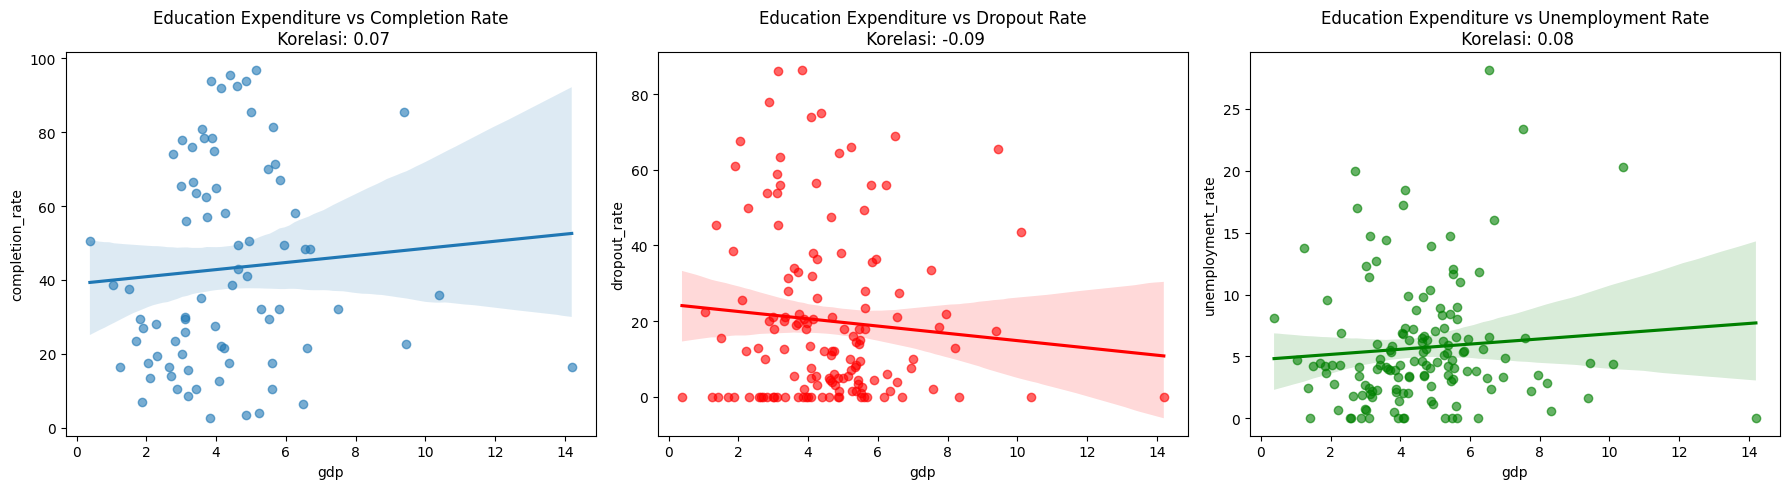

Korelasi Education Expenditure dengan Completion Rate: 0.07
Korelasi Education Expenditure dengan Dropout Rate: -0.09
Korelasi Education Expenditure dengan Unemployment Rate: 0.08


In [75]:
# Hitung korelasi Pearson
correlation_completion, _ = pearsonr(df_cleaned_gdp_cr["gdp"], df_cleaned_gdp_cr["completion_rate"])
correlation_dropout, _ = pearsonr(df_cleaned_gdp["gdp"], df_cleaned_gdp["dropout_rate"])
correlation_unemployment, _ = pearsonr(df_cleaned_gdp["gdp"], df_cleaned_gdp["unemployment_rate"])

# Plot hubungan pengeluaran pendidikan dengan completion rate, dropout rate, dan unemployment rate
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.regplot(x="gdp", y="completion_rate", data=df_cleaned_gdp_cr, ax=axes[0], scatter_kws={"alpha":0.6})
axes[0].set_title(f"Education Expenditure vs Completion Rate\n Korelasi: {correlation_completion:.2f}")

sns.regplot(x="gdp", y="dropout_rate", data=df_cleaned_gdp, ax=axes[1], scatter_kws={"alpha":0.6}, color="red")
axes[1].set_title(f"Education Expenditure vs Dropout Rate\n Korelasi: {correlation_dropout:.2f}")

sns.regplot(x="gdp", y="unemployment_rate", data=df_cleaned_gdp, ax=axes[2], scatter_kws={"alpha":0.6}, color="green")
axes[2].set_title(f"Education Expenditure vs Unemployment Rate\n Korelasi: {correlation_unemployment:.2f}")

plt.tight_layout()
plt.show()

# Tampilkan hasil korelasi
print("Korelasi Education Expenditure dengan Completion Rate:", round(correlation_completion, 2))
print("Korelasi Education Expenditure dengan Dropout Rate:", round(correlation_dropout, 2))
print("Korelasi Education Expenditure dengan Unemployment Rate:", round(correlation_unemployment, 2))


Pengaruh Kualitas Pendidikan terhadap Faktor Sosial (Kriminalitas & Pengangguran)

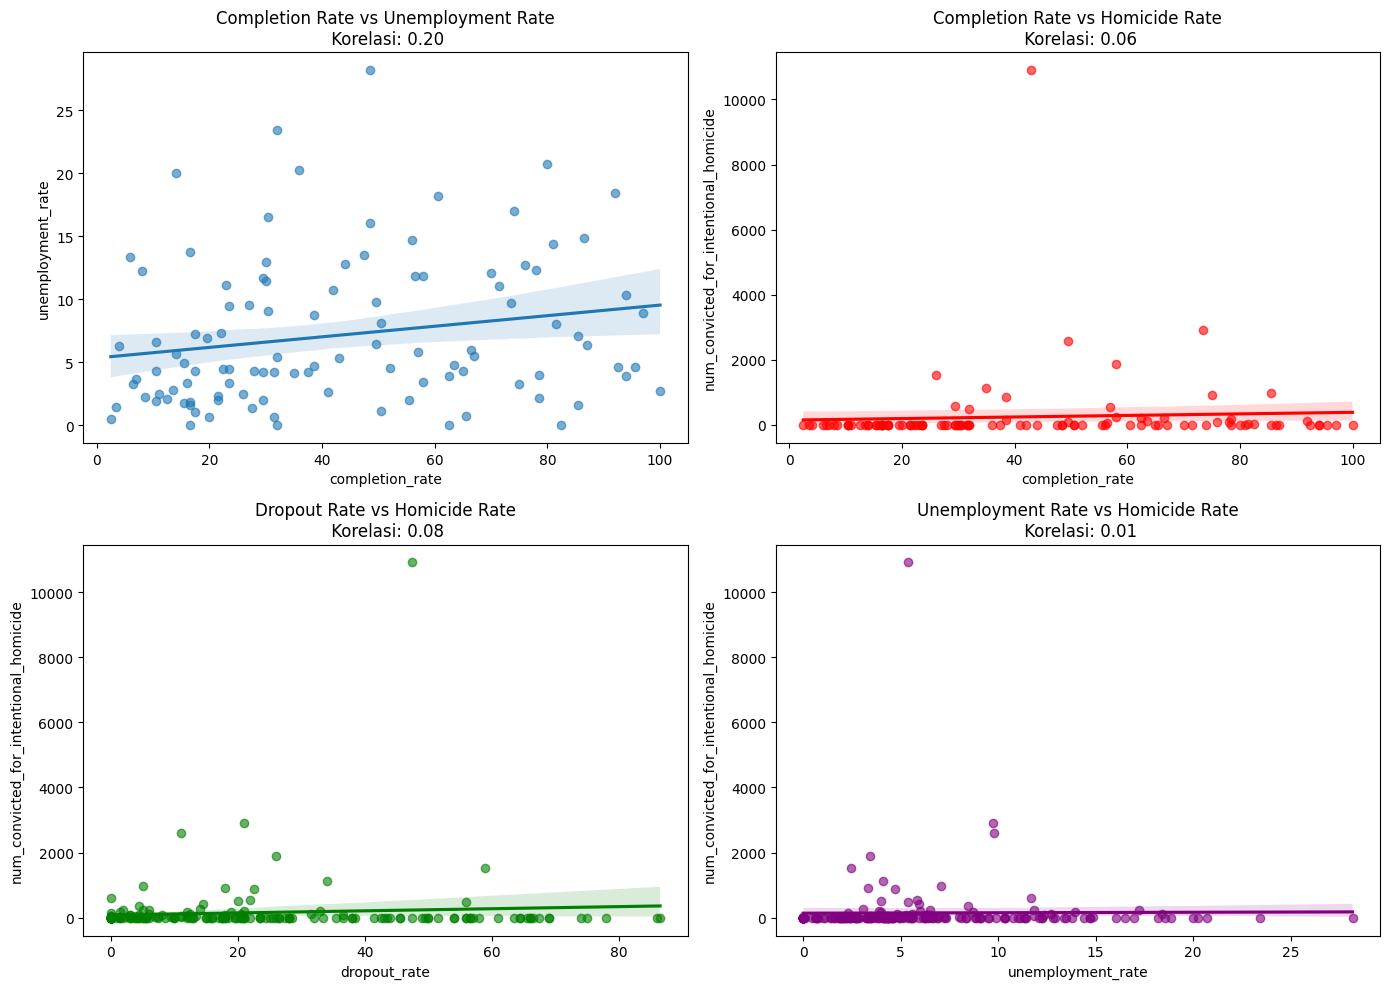

Korelasi Completion Rate dengan Unemployment Rate: 0.2
Korelasi Completion Rate dengan Homicide Rate: 0.06
Korelasi Dropout Rate dengan Homicide Rate: 0.08
Korelasi Unemployment Rate dengan Homicide Rate: 0.01


In [76]:
# Hitung korelasi Pearson
corr_completion_unemployment, _ = pearsonr(df_cleaned_cr["completion_rate"], df_cleaned_cr["unemployment_rate"])
corr_completion_homicide, _ = pearsonr(df_cleaned_cr["completion_rate"], df_cleaned_cr["num_convicted_for_intentional_homicide"])
corr_dropout_homicide, _ = pearsonr(df["dropout_rate"], df["num_convicted_for_intentional_homicide"])
corr_unemployment_homicide, _ = pearsonr(df["unemployment_rate"], df["num_convicted_for_intentional_homicide"])

# Plot hubungan antar variabel
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.regplot(x="completion_rate", y="unemployment_rate", data=df_cleaned_cr, ax=axes[0, 0], scatter_kws={"alpha":0.6})
axes[0, 0].set_title(f"Completion Rate vs Unemployment Rate\n Korelasi: {corr_completion_unemployment:.2f}")

sns.regplot(x="completion_rate", y="num_convicted_for_intentional_homicide", data=df_cleaned_cr, ax=axes[0, 1], scatter_kws={"alpha":0.6}, color="red")
axes[0, 1].set_title(f"Completion Rate vs Homicide Rate\n Korelasi: {corr_completion_homicide:.2f}")

sns.regplot(x="dropout_rate", y="num_convicted_for_intentional_homicide", data=df, ax=axes[1, 0], scatter_kws={"alpha":0.6}, color="green")
axes[1, 0].set_title(f"Dropout Rate vs Homicide Rate\n Korelasi: {corr_dropout_homicide:.2f}")

sns.regplot(x="unemployment_rate", y="num_convicted_for_intentional_homicide", data=df, ax=axes[1, 1], scatter_kws={"alpha":0.6}, color="purple")
axes[1, 1].set_title(f"Unemployment Rate vs Homicide Rate\n Korelasi: {corr_unemployment_homicide:.2f}")

plt.tight_layout()
plt.show()

# Tampilkan hasil korelasi
print("Korelasi Completion Rate dengan Unemployment Rate:", round(corr_completion_unemployment, 2))
print("Korelasi Completion Rate dengan Homicide Rate:", round(corr_completion_homicide, 2))
print("Korelasi Dropout Rate dengan Homicide Rate:", round(corr_dropout_homicide, 2))
print("Korelasi Unemployment Rate dengan Homicide Rate:", round(corr_unemployment_homicide, 2))


Apakah ada perbedaan signifikan completion rate, dropout rate, unemployment rate berdasarkan country status (high income, middle income, low income & conflict zone)

Cek normalitas data (Shapiro-Wilk)

In [46]:
# Variabel yang akan diuji
variables = ['completion_rate', 'dropout_rate', 'unemployment_rate']

# Uji normalitas Shapiro-Wilk untuk setiap variabel berdasarkan country_status
for var in variables:
    print(f"\n=== Uji Normalitas Shapiro-Wilk untuk {var} ===")
    for status, subset in df.groupby('country_status'):
        stat, p_value = stats.shapiro(subset[var])
        print(f"{status}: p-value = {p_value:.4f} {'(Tidak Normal)' if p_value < 0.05 else '(Normal)'}")


=== Uji Normalitas Shapiro-Wilk untuk completion_rate ===
Conflict Zone: p-value = 0.0023 (Tidak Normal)
High Income: p-value = 0.0000 (Tidak Normal)
Low Income: p-value = 0.0002 (Tidak Normal)
Middle Income: p-value = 0.0000 (Tidak Normal)
unknown: p-value = 0.0000 (Tidak Normal)

=== Uji Normalitas Shapiro-Wilk untuk dropout_rate ===
Conflict Zone: p-value = 0.0090 (Tidak Normal)
High Income: p-value = 0.0000 (Tidak Normal)
Low Income: p-value = 0.0158 (Tidak Normal)
Middle Income: p-value = 0.0000 (Tidak Normal)
unknown: p-value = 0.0001 (Tidak Normal)

=== Uji Normalitas Shapiro-Wilk untuk unemployment_rate ===
Conflict Zone: p-value = 0.2839 (Normal)
High Income: p-value = 0.0003 (Tidak Normal)
Low Income: p-value = 0.0010 (Tidak Normal)
Middle Income: p-value = 0.0000 (Tidak Normal)
unknown: p-value = 0.0031 (Tidak Normal)


Mann-Whitney U Test

In [78]:
# Pastikan kolom kategori benar
print(df_cleaned_cr["country_status"].unique())  # Cek kategori negara

# Pisahkan data berdasarkan kategori
low_income = df_cleaned_cr[df_cleaned_cr["country_status"] == "Low Income"]["completion_rate"]
middle_income = df_cleaned_cr[df_cleaned_cr["country_status"] == "Middle Income"]["completion_rate"]
high_income = df_cleaned_cr[df_cleaned_cr["country_status"] == "High Income"]["completion_rate"]

# Fungsi untuk melakukan uji Mann-Whitney U
def mann_whitney_test(group1, group2, label1, label2):
    stat, p = mannwhitneyu(group1, group2, alternative='two-sided')
    print(f"Uji Mann-Whitney antara {label1} vs {label2}:")
    print(f"  Statistik U: {stat}")
    print(f"  P-Value: {p}")
    if p < 0.05:
        print("  Hasil: Perbedaan signifikan\n")
    else:
        print("  Hasil: Tidak ada perbedaan signifikan\n")

# Melakukan pengujian antar kategori
mann_whitney_test(low_income, middle_income, "Low Income", "Middle Income")
mann_whitney_test(low_income, high_income, "Low Income", "High Income")
mann_whitney_test(middle_income, high_income, "Middle Income", "High Income")

['Conflict Zone' 'Middle Income' 'High Income' 'Low Income' 'unknown']
Uji Mann-Whitney antara Low Income vs Middle Income:
  Statistik U: 201.0
  P-Value: 0.0002247660704422377
  Hasil: Perbedaan signifikan

Uji Mann-Whitney antara Low Income vs High Income:
  Statistik U: 4.5
  P-Value: 0.009280869410531562
  Hasil: Perbedaan signifikan

Uji Mann-Whitney antara Middle Income vs High Income:
  Statistik U: 62.0
  P-Value: 0.12522923173036904
  Hasil: Tidak ada perbedaan signifikan



Visualisasi Boxplot untuk membandingkan Completion Rate berdasarkan klasifikasi ekonomi negara (Low Income, Middle Income, dan High Income)

/var/folders/nk/tj46lgrj24l56dcl01d8smmw0000gn/T/ipykernel_53649/2345583926.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="country_status", y="completion_rate", data=df_cleaned_cr, order=order, palette="muted")


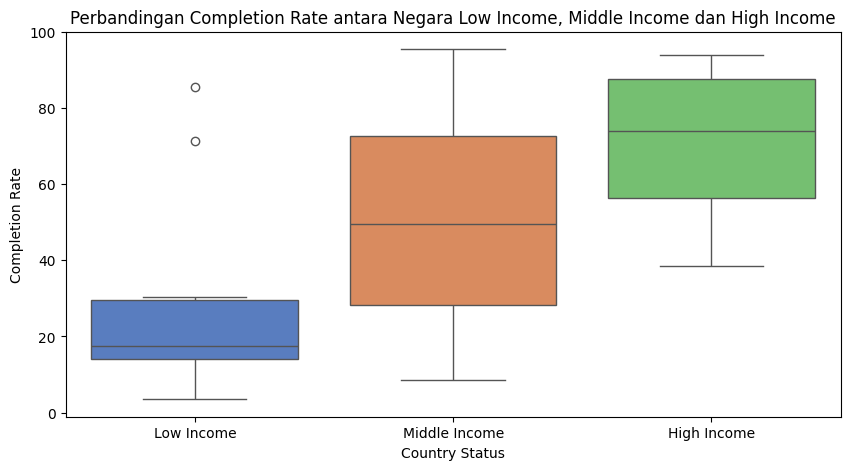

In [80]:
# Pastikan data sudah dalam format yang benar
order = ["Low Income", "Middle Income", "High Income"]  # Urutan kategori

plt.figure(figsize=(10, 5))
sns.boxplot(x="country_status", y="completion_rate", data=df_cleaned_cr, order=order, palette="muted")

plt.title("Perbandingan Completion Rate antara Negara Low Income, Middle Income dan High Income")
plt.xlabel("Country Status")
plt.ylabel("Completion Rate")
plt.show()